<a href="https://colab.research.google.com/github/marcelofxavier/MVP-Sprint-Machine-Learning-e-Analytics/blob/main/MarceloXavier_MVP_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Marcelo Xavier - Machine Learning & Analytics

##**Definição do Problema**
Temos um conjunto de dados com exames médicos realizados por pacientes. O objetivo desse notebook é criar um modelo de Machine Learning que consiga classificar se uma pessoa está com um alto risco ou não de ter doenças cardiovasculares.

##**Motivação**
Doenças cardiovasculares são a principal causa de morte no mundo, levando aproximadamente 17,9 milhões de vidas a cada ano, segunda a Organização Mundial de Saúde (OMS). A maioria das doenças cardiovasculares pode ser prevenida ao abordar fatores de risco comportamentais, como o uso de tabaco, dieta não saudável e obesidade, inatividade física e consumo prejudicial de álcool.

Pessoas com doença cardiovascular ou que estão em alto risco cardiovascular necessitam de detecção precoce e gerenciamento, podendo um modelo de machine learning servir de grande ajuda.


##**Conjunto de dados**:

1. **id**: Identificador para cada indivíduo no conjunto de dados.
2. **age**: A idade do indivíduo (em dias).
3. **gender**: Gênero (1 para feminino, 2 para masculino).
4. **height**: Altura em centímetros.
5. **weight**: Peso em quilogramas.
6. **ap_hi**: Pressão arterial sistólica (medida em mmHg).
7. **ap_lo**: Pressão arterial diastólica (medida em mmHg).
8. **cholesterol**: Nível de colesterol (1, 2 ou 3).
9. **gluc**: Nível de glicose (1, 2 ou 3).
10. **smoke**: Se o indivíduo fuma (0 para não, 1 para sim).
11. **alco**: Se o indivíduo consome álcool (0 para não, 1 para sim).
12. **active**: Se o indivíduo é fisicamente ativo (0 para não, 1 para sim).
13. **cardio**: Presença de doença cardiovascular (0 para não, 1 para sim).

##**Estrutura**

O notebook está dividido em:

1. Importação das bibliotecas
2. Importação do dataset e análise dos dados
3. Treinamento do modelo
4. Criação e avaliação dos algoritmos de Machine Learning
5. Feature Selection
6. Avaliação do modelo final
7. Finalização do modelo



# 1. Importação das bibliotecas

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #biblioteca para criação de gráficos
import seaborn as sns #biblioteca para criação de gráfico heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Importação do dataset e análise dos dados

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/marcelofxavier/MVP-Sprint-Machine-Learning-e-Analytics/main/Cardiovascular_disease_dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Exibe um resumo do dataset, mostrando as colunas e o tipo dos dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Verificando se possuem valores nulos em nosso dataset
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Podemos perceber que não temos valores nulos em nosso conjunto de dados

In [ ]:
# Verificando se temos valores duplicados
dataset.duplicated().sum()

0

Podemos perceber que não temos valores duplicados em nosso conjunto de dados

In [ ]:
# Verificando quantos dados distintos temos no dataset
dataset.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
# Entendendo melhor os dados presentes no dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Retirando coluna id
dataset.drop('id',axis=1,inplace=True)

# Transformando idade de dias para anos
dataset['age']=(dataset['age']/365).astype(int)

dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Removendo Outliers

Remover outliers é uma etapa importante para melhorar a performance do modelo. Removemos os valores discrepantes fora do intervalo de 2,5% a 97,5% em todas as ocorrências das características de ap_hi, ap_lo, weight e height. Esse procedimento resultou na redução do conjunto de dados de 70.000 para 60.142 registros.

In [ ]:
dataset.drop(dataset[(dataset['height'] > dataset['height'].quantile(0.975)) | (dataset['height'] < dataset['height'].quantile(0.025))].index,inplace=True)
dataset.drop(dataset[(dataset['weight'] > dataset['weight'].quantile(0.975)) | (dataset['weight'] < dataset['weight'].quantile(0.025))].index,inplace=True)
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.975)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.025))].index,inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.975)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.025))].index,inplace=True)

# Checando quantas linhas restaram no dataset
len(dataset)

60142

In [ ]:
# Checando como ficaram os novos dados presentes no dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,60142.0,52.839962,6.748089,29.0,48.0,53.0,58.0,64.0
gender,60142.0,1.347311,0.476120,1.0,1.0,1.0,2.0,2.0
height,60142.0,164.554854,6.830174,150.0,160.0,165.0,169.0,180.0
weight,60142.0,73.426805,11.614806,52.0,65.0,72.0,80.0,106.0
ap_hi,60142.0,125.770526,13.761847,100.0,120.0,120.0,135.0,163.0
ap_lo,60142.0,81.046307,8.239157,60.0,80.0,80.0,90.0,100.0
cholesterol,60142.0,1.350953,0.670076,1.0,1.0,1.0,1.0,3.0
gluc,60142.0,1.220229,0.567607,1.0,1.0,1.0,1.0,3.0
smoke,60142.0,0.085631,0.279820,0.0,0.0,0.0,0.0,1.0
alco,60142.0,0.051877,0.221781,0.0,0.0,0.0,0.0,1.0


<Axes: >

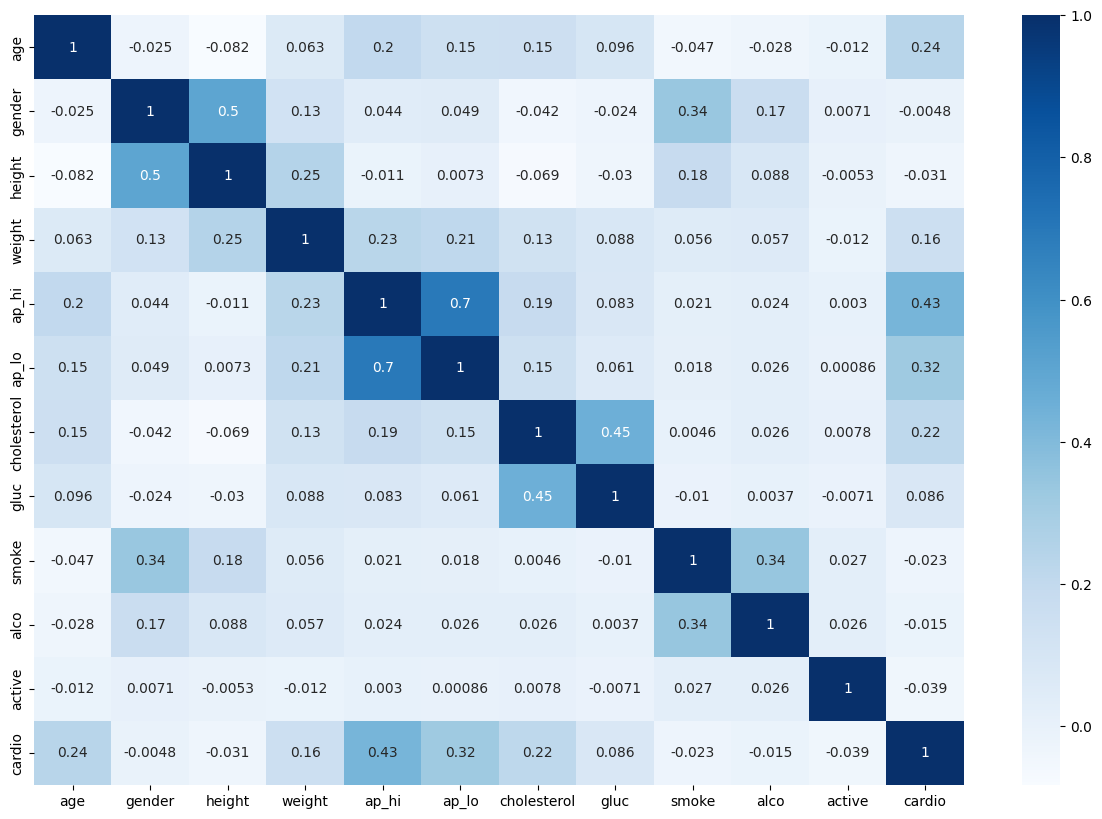

In [ ]:
# Criando um mapa de calor das correlações entre as colunas do dataset

plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')

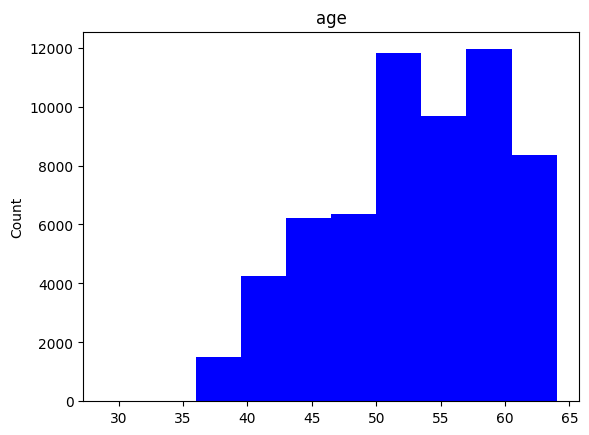

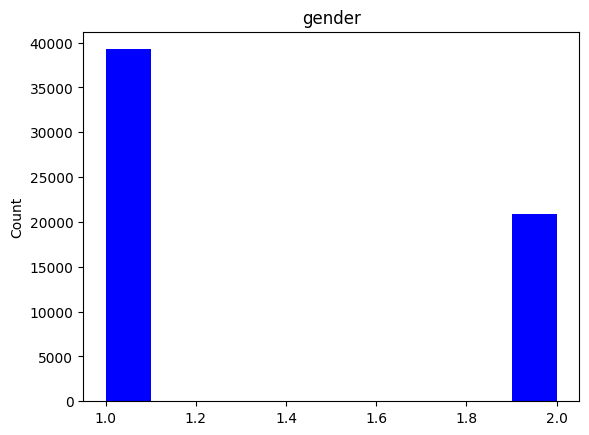

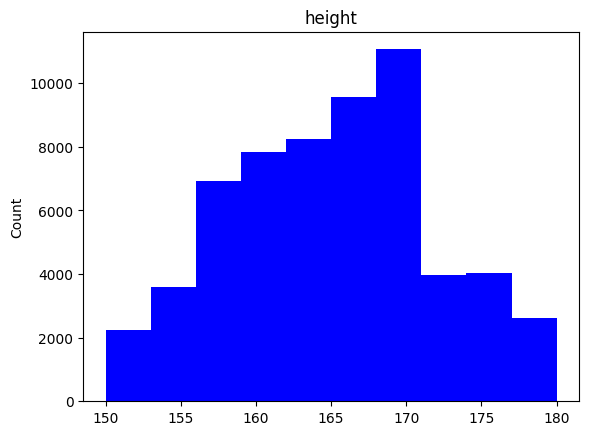

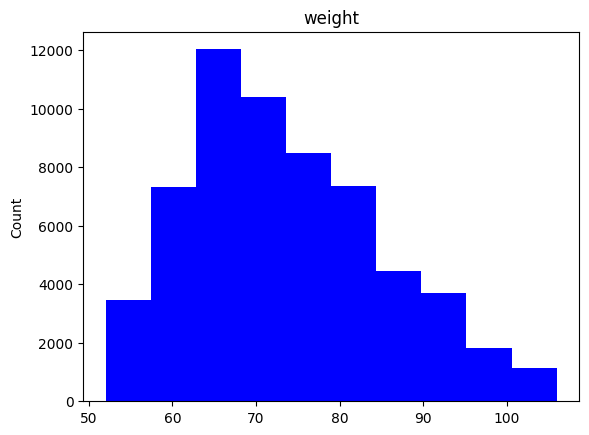

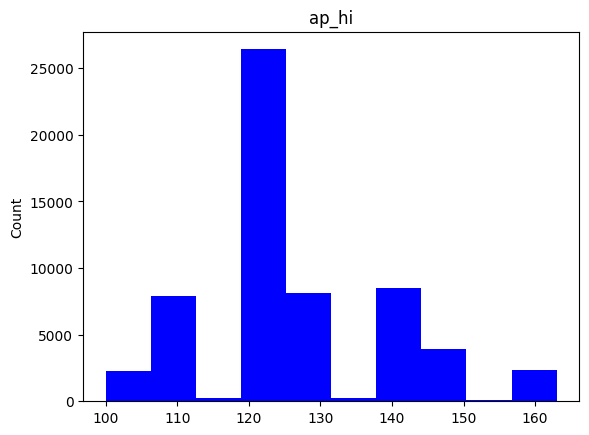

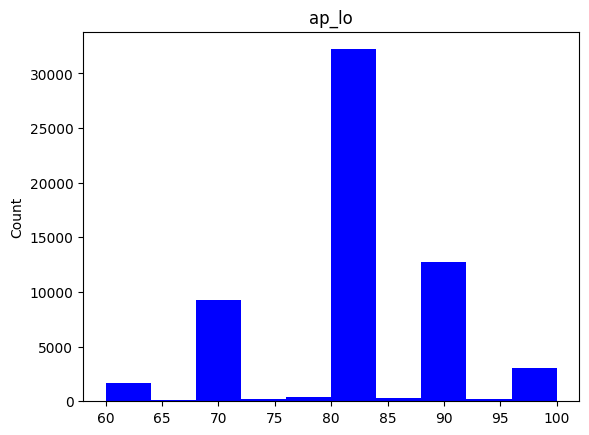

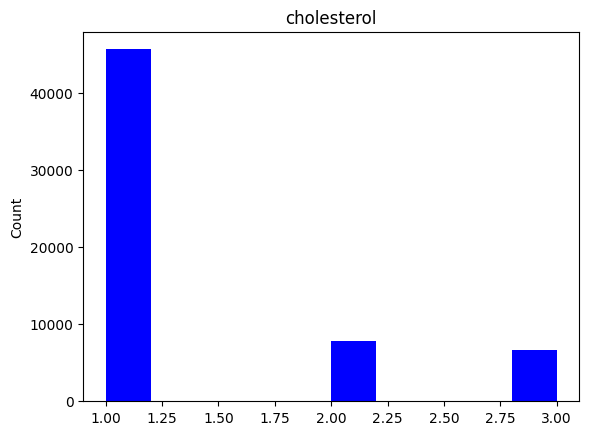

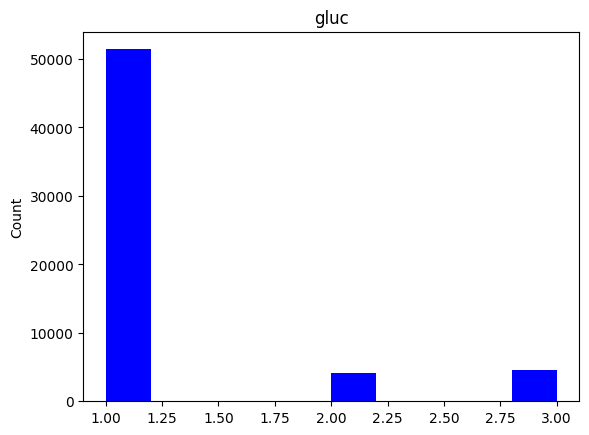

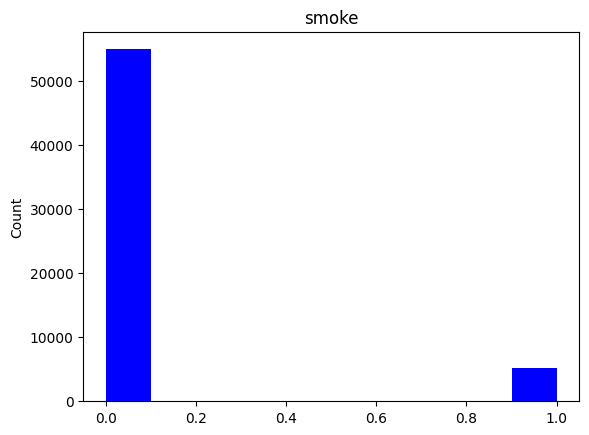

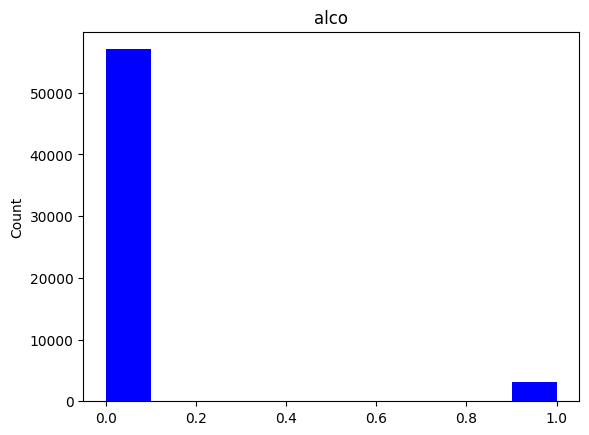

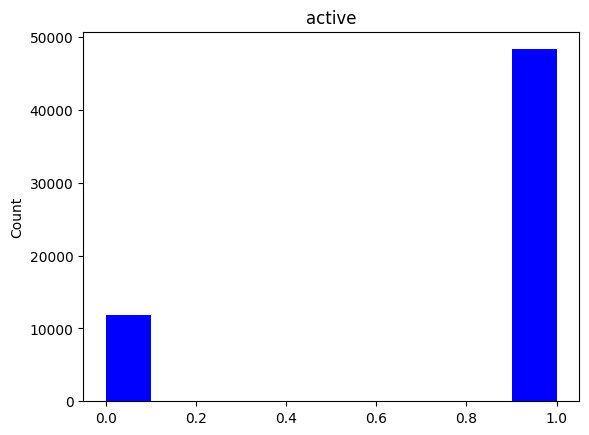

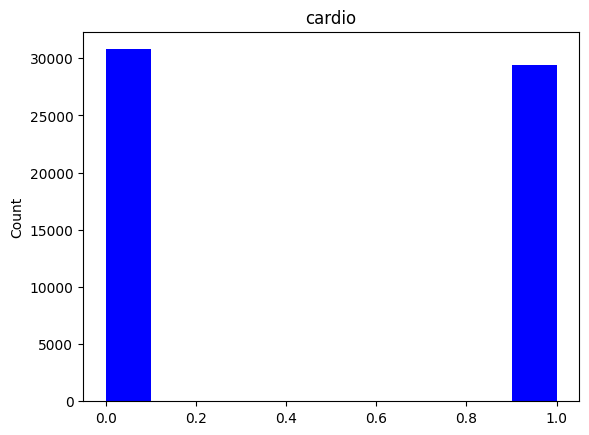

In [ ]:
#exibindo um gráfico de barras com os valores presentes nas colunas do dataset
for coluna in dataset.columns:
    #plt.figure(figsize=(10, 4))
    plt.title(coluna)
    plt.ylabel('Count')
    plt.hist(dataset[coluna],color="blue")
    plt.show()

In [ ]:
# mostrando a quantidade de pessoas com e sem doenças cardiovasculares
counts = dataset['cardio'].value_counts()
print(counts)

cardio
0    30779
1    29363
Name: count, dtype: int64


Conseguimos observar que é um dataset equilibrado na quantidade de pessoas com e sem doenças cardiovasculares

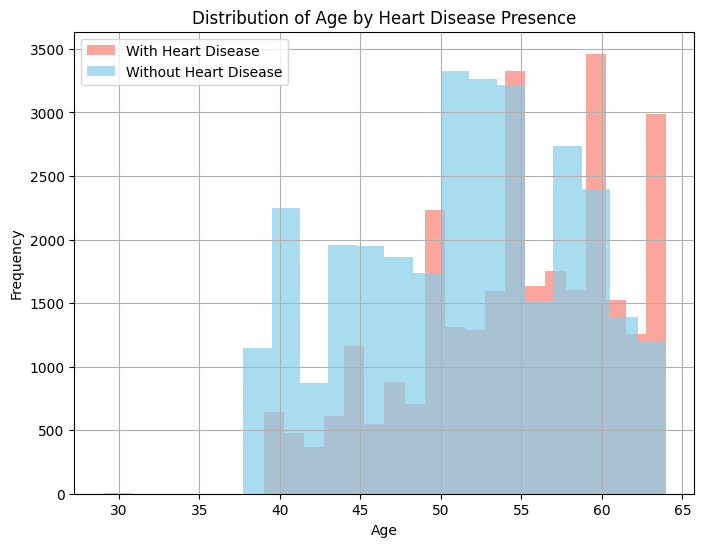

In [ ]:
# Separando o dataset em pessoas com e sem doenças cardiovasculares
age_with_disease = dataset[dataset['cardio'] == 1]['age']
age_without_disease = dataset[dataset['cardio'] == 0]['age']

# Plotando uma distribuição por idade de pacientes com e sem doenças cardiovasculares
plt.figure(figsize=(8, 6))
plt.hist(age_with_disease, bins=20, color='salmon', alpha=0.7, label='With Heart Disease')
plt.hist(age_without_disease, bins=20, color='skyblue', alpha=0.7, label='Without Heart Disease')
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

É possível observar um aumento na incidência de doenças cardiovasculares à medida que a idade avança.

# 3. Treinamento do modelo

## Separando os dados em conjunto de treino e teste com holdout e realizando validação cruzada
Utilizaremos 80% do dataset para treinamento e 20% para teste

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# 4. Criação e avaliação dos algoritmos de Machine Learning

LR: 0.712718 (0.005559)
KNN: 0.683932 (0.005882)
CART: 0.626837 (0.003282)
NB: 0.711658 (0.005886)
SVM: 0.711367 (0.005294)
Bagging: 0.691497 (0.004502)
RF: 0.699749 (0.004902)
ET: 0.688920 (0.005725)
Ada: 0.725064 (0.004676)
GB: 0.729865 (0.004097)
Voting: 0.715461 (0.005858)


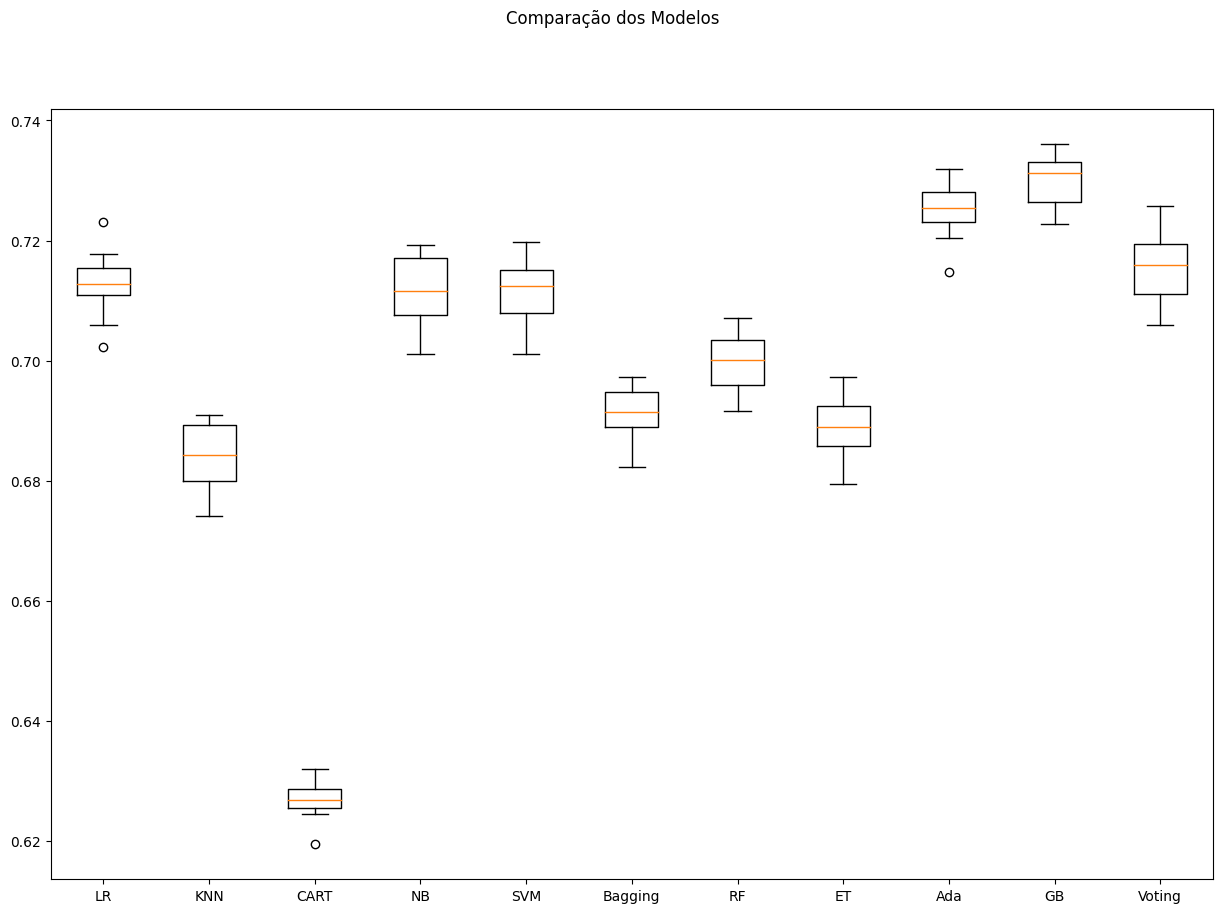

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Padronização, Normalização e Pipelines

LR-orig: 0.712718 (0.005559)
KNN-orig: 0.683932 (0.005882)
CART-orig: 0.626837 (0.003282)
NB-orig: 0.711658 (0.005886)
SVM-orig: 0.711367 (0.005294)
Bag-orig: 0.691497 (0.004502)
RF-orig: 0.699749 (0.004902)
ET-orig: 0.688920 (0.005725)
Ada-orig: 0.725064 (0.004676)
GB-orig: 0.729865 (0.004097)
Vot-orig: 0.715461 (0.005858)
LR-padr: 0.720907 (0.005331)
KNN-padr: 0.689294 (0.005744)
CART-padr: 0.628645 (0.004195)
NB-padr: 0.711658 (0.005886)
SVM-padr: 0.728576 (0.003676)
Bag-padr: 0.691850 (0.003938)
RF-padr: 0.700809 (0.004542)
ET-padr: 0.688920 (0.005111)
Ada-padr: 0.725064 (0.004676)
GB-padr: 0.729886 (0.004109)
Vot-padr: 0.726061 (0.004194)
LR-norm: 0.721011 (0.005382)
KNN-norm: 0.688941 (0.006313)
CART-norm: 0.627772 (0.005034)
NB-norm: 0.711658 (0.005886)
SVM-norm: 0.726332 (0.005044)
Bag-norm: 0.691643 (0.004634)
RF-norm: 0.700642 (0.005378)
ET-norm: 0.689564 (0.005734)
Ada-norm: 0.725064 (0.004676)
GB-norm: 0.729865 (0.004097)
Vot-norm: 0.725396 (0.004591)


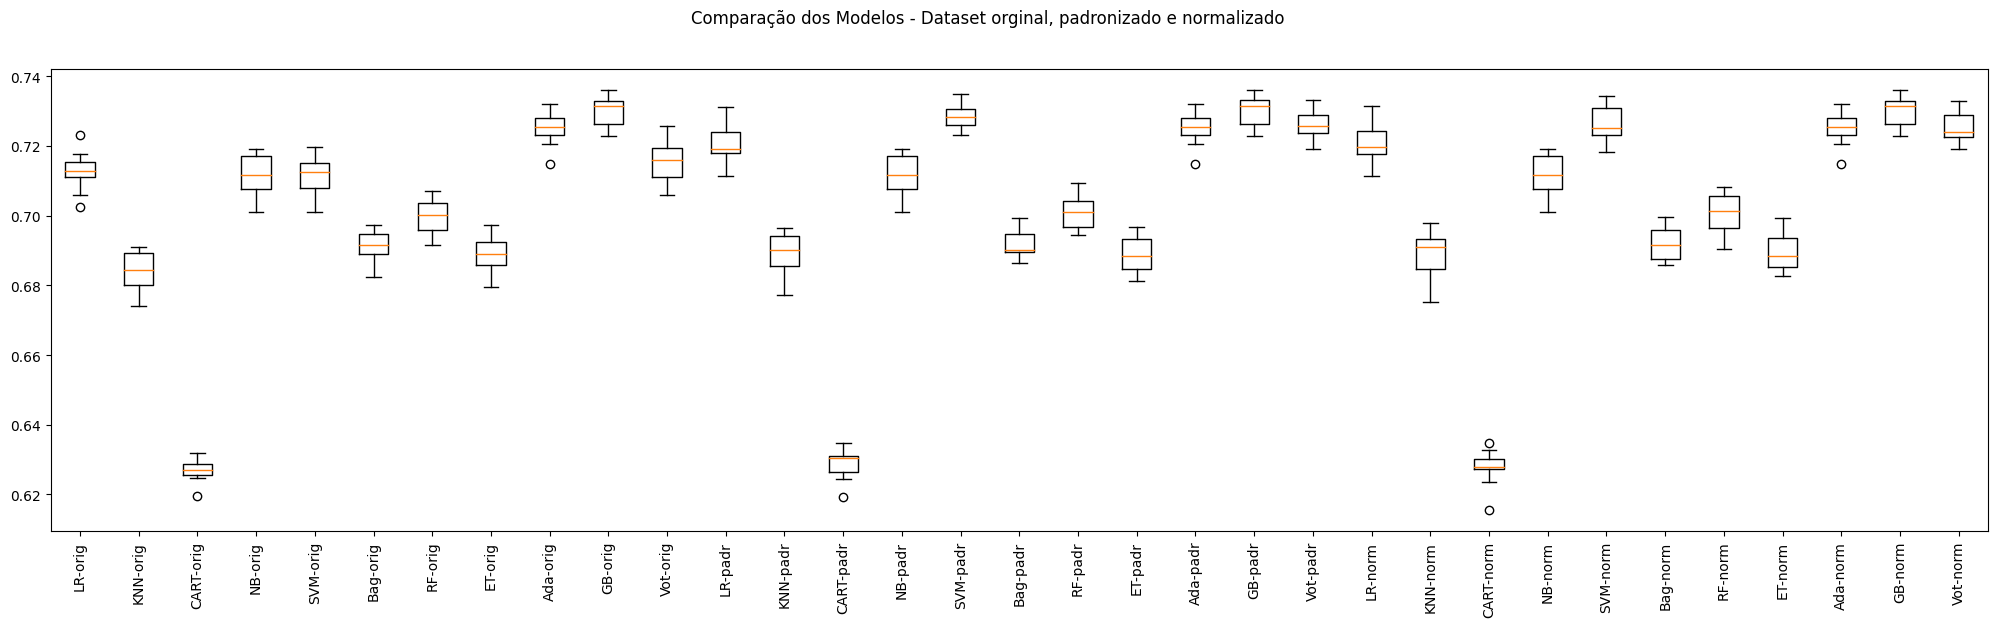

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#5. Feature Selection

Realizaremos o feature selection no modelo para checar se a acurácia melhora ao escolher apenas os dados mais relevantes

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:11])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:11]))


Número original de atributos: 11

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

Scores dos Atributos Originais: [3.588e+03 1.402e+00 5.698e+01 1.540e+03 1.353e+04 6.935e+03 2.961e+03
 4.468e+02 3.313e+01 1.307e+01 8.957e+01]

Atributos Selecionados: ['age' 'ap_hi' 'ap_lo' 'cholesterol']


In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:11])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:11]))

Atributos Originais: Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

Atributos Selecionados: [False False False False False False  True False  True  True  True]

Ranking de atributos: [4 5 6 7 3 8 1 2 1 1 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['cholesterol' 'smoke' 'alco' 'active']


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:11])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')
[0.18  0.013 0.222 0.24  0.173 0.088 0.044 0.017 0.007 0.007 0.01 ]


Após o feature selection, percebemos as 4 colunas que mais possuem dados relevantes para a classificação de um paciente com doenças cardiovasculares. São elas:

1. cholesterol
2. smoke
3. alco
4. active

In [ ]:
#dataset com as colunas do feature selection
dataset_FS = dataset[['cholesterol','smoke','alco','active', 'cardio']]

In [ ]:
## Separação em bases de treino e teste

array = dataset_FS.values
x_FS = array[:,0:4] # atributos
y_FS = array[:,4] # classe

X_FS_train, X_FS_test, y_FS_train, y_FS_test = train_test_split(x_FS,y_FS,test_size=test_size, shuffle=True, random_state=seed, stratify=y_FS) # holdout com estratificação

## Parâmetros e partições da validação cruzada
scoringfs = 'accuracy'
num_particoes_FS = 10
kfoldfs = StratifiedKFold(n_splits= num_particoes_FS, shuffle=True, random_state=seed) # validação cruzada com estratificação

Avaliando os algoritmos após o Feature Selection

LR_FS: 0.591545 (0.005008)
KNN_FS: 0.541538 (0.018713)
CART_FS: 0.591337 (0.004926)
NB_FS: 0.589799 (0.004904)
SVM_FS: 0.591441 (0.004983)
Bagging_FS: 0.591378 (0.004889)
RF_FS: 0.591358 (0.004937)
ET_FS: 0.591337 (0.004926)
Ada_FS: 0.591545 (0.005008)
GB_FS: 0.591545 (0.005008)
Voting_FS: 0.591441 (0.004983)


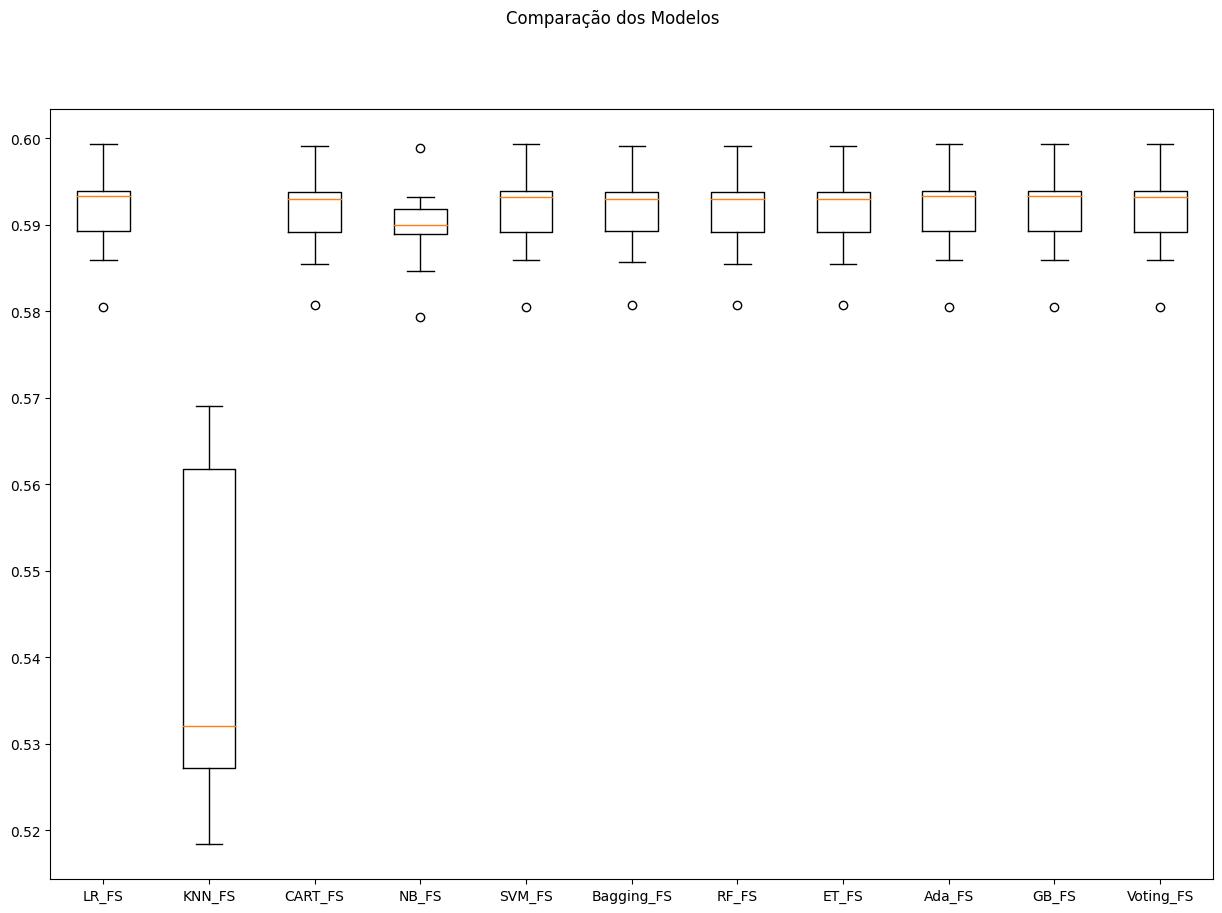

In [ ]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models_FS = []

# Criando os modelos e adicionando-os na lista de modelos
models_FS.append(('LR_FS', LogisticRegression(max_iter=200)))
models_FS.append(('KNN_FS', KNeighborsClassifier()))
models_FS.append(('CART_FS', DecisionTreeClassifier()))
models_FS.append(('NB_FS', GaussianNB()))
models_FS.append(('SVM_FS', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases_FS = []
model1 = LogisticRegression(max_iter=200)
bases_FS.append(('logistic_FS', model1))
model2 = DecisionTreeClassifier()
bases_FS.append(('cart_FS', model2))
model3 = SVC()
bases_FS.append(('svm_FS', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models_FS.append(('Bagging_FS', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models_FS.append(('RF_FS', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models_FS.append(('ET_FS', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models_FS.append(('Ada_FS', AdaBoostClassifier(n_estimators=num_trees)))
models_FS.append(('GB_FS', GradientBoostingClassifier(n_estimators=num_trees)))
models_FS.append(('Voting_FS', VotingClassifier(bases)))

# Listas para armazenar os resultados
results_FS = []
names_FS = []

# Avaliação dos modelos
for name_FS, model_FS in models_FS:
    cv_results_FS = cross_val_score(model_FS, X_FS_train, y_FS_train, cv=kfold, scoring=scoring)
    results_FS.append(cv_results_FS)
    names_FS.append(name_FS)
    msg = "%s: %.6f (%.6f)" % (name_FS, cv_results_FS.mean(), cv_results_FS.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results_FS)
ax.set_xticklabels(names_FS)
plt.show()

Usaremos agora a padronização, normalização e pipelines nas colunas do feature selection

LR-orig_FS: 0.591545 (0.005008)
KNN-orig_FS: 0.541538 (0.018713)
CART-orig_FS: 0.591337 (0.004926)
NB-orig_FS: 0.589799 (0.004904)
SVM-orig_FS: 0.591441 (0.004983)
Bag-orig_FS: 0.591378 (0.004889)
RF-orig_FS: 0.591358 (0.004937)
ET-orig_FS: 0.591337 (0.004926)
Ada-orig_FS: 0.591545 (0.005008)
GB-orig_FS: 0.591545 (0.005008)
Vot-orig_FS: 0.591441 (0.004983)
LR-padr_FS: 0.591545 (0.005008)
KNN-padr_FS: 0.557126 (0.024991)
CART-padr_FS: 0.591337 (0.004926)
NB-padr_FS: 0.589799 (0.004904)
SVM-padr_FS: 0.591275 (0.004830)
Bag-padr_FS: 0.591275 (0.004830)
RF-padr_FS: 0.591316 (0.004828)
ET-padr_FS: 0.591337 (0.004926)
Ada-padr_FS: 0.591545 (0.005008)
GB-padr_FS: 0.591545 (0.005008)
Vot-padr_FS: 0.591275 (0.004830)
LR-norm_FS: 0.591545 (0.005008)
KNN-norm_FS: 0.551431 (0.017667)
CART-norm_FS: 0.591337 (0.004926)
NB-norm_FS: 0.589799 (0.004904)
SVM-norm_FS: 0.591233 (0.004861)
Bag-norm_FS: 0.591295 (0.004841)
RF-norm_FS: 0.591316 (0.004854)
ET-norm_FS: 0.591337 (0.004926)
Ada-norm_FS: 0.591545

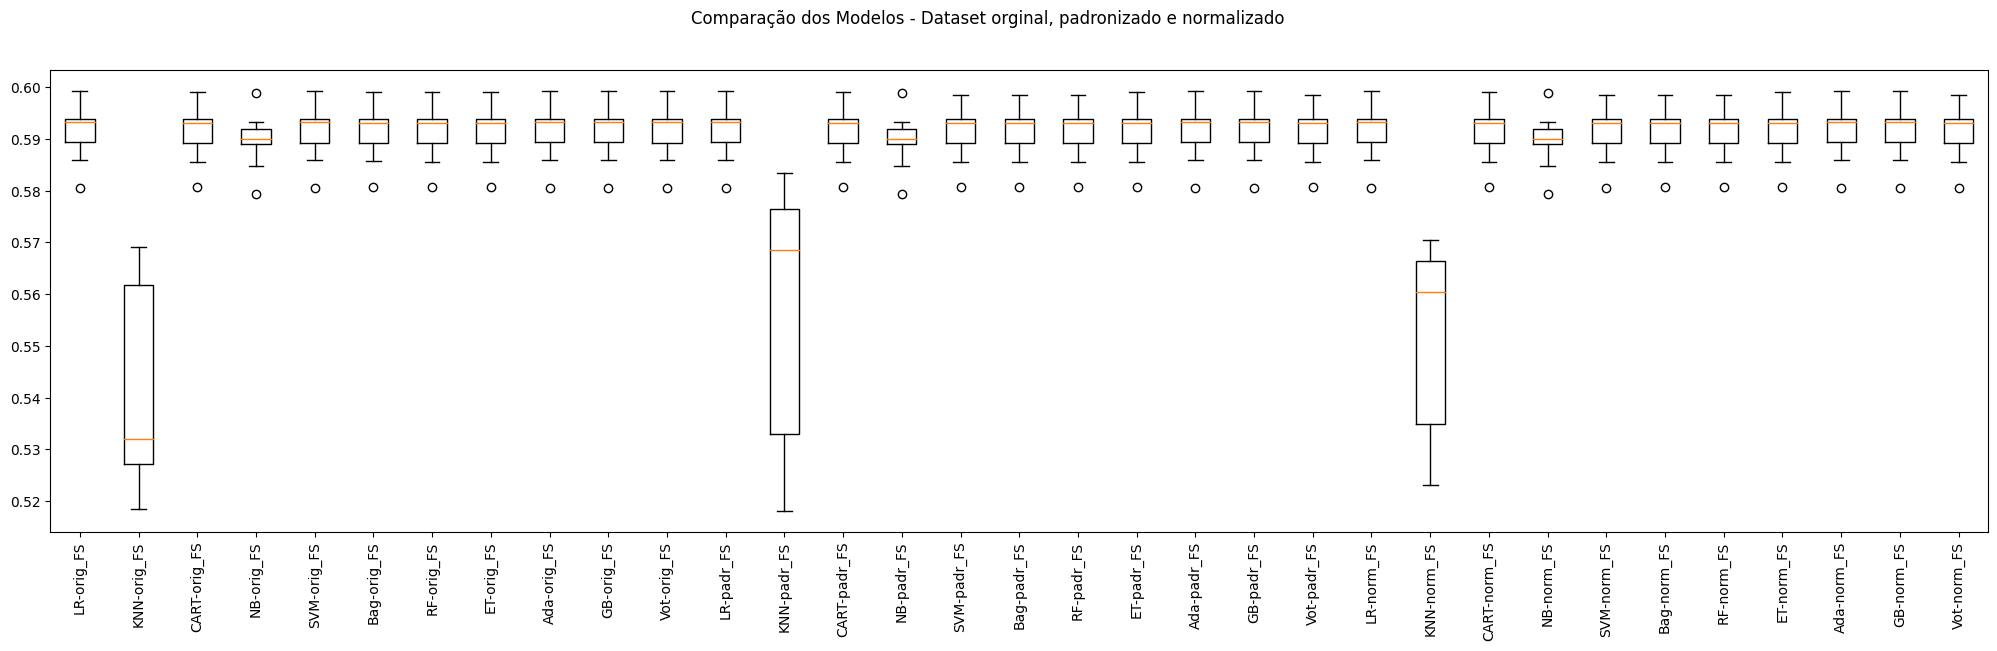

In [ ]:
np.random.seed(seed) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines_FS = []
results_FS = []
names_FS = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
bagging_FS = ('Bag_FS', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest_FS = ('RF_FS', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees_FS = ('ET_FS', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost_FS = ('Ada_FS', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting_FS = ('GB_FS', GradientBoostingClassifier(n_estimators=num_trees))
voting_FS = ('Voting_FS', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler_FS = ('StandardScaler_FS', StandardScaler())
min_max_scaler_FS = ('MinMaxScaler_FS', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines_FS.append(('LR-orig_FS', Pipeline([reg_log])))
pipelines_FS.append(('KNN-orig_FS', Pipeline([knn])))
pipelines_FS.append(('CART-orig_FS', Pipeline([cart])))
pipelines_FS.append(('NB-orig_FS', Pipeline([naive_bayes])))
pipelines_FS.append(('SVM-orig_FS', Pipeline([svm])))
pipelines_FS.append(('Bag-orig_FS', Pipeline([bagging])))
pipelines_FS.append(('RF-orig_FS', Pipeline([random_forest])))
pipelines_FS.append(('ET-orig_FS', Pipeline([extra_trees])))
pipelines_FS.append(('Ada-orig_FS', Pipeline([adaboost])))
pipelines_FS.append(('GB-orig_FS', Pipeline([gradient_boosting])))
pipelines_FS.append(('Vot-orig_FS', Pipeline([voting])))

# Dataset Padronizado
pipelines_FS.append(('LR-padr_FS', Pipeline([standard_scaler, reg_log])))
pipelines_FS.append(('KNN-padr_FS', Pipeline([standard_scaler, knn])))
pipelines_FS.append(('CART-padr_FS', Pipeline([standard_scaler, cart])))
pipelines_FS.append(('NB-padr_FS', Pipeline([standard_scaler, naive_bayes])))
pipelines_FS.append(('SVM-padr_FS', Pipeline([standard_scaler, svm])))
pipelines_FS.append(('Bag-padr_FS', Pipeline([standard_scaler, bagging])))
pipelines_FS.append(('RF-padr_FS', Pipeline([standard_scaler, random_forest])))
pipelines_FS.append(('ET-padr_FS', Pipeline([standard_scaler, extra_trees])))
pipelines_FS.append(('Ada-padr_FS', Pipeline([standard_scaler, adaboost])))
pipelines_FS.append(('GB-padr_FS', Pipeline([standard_scaler, gradient_boosting])))
pipelines_FS.append(('Vot-padr_FS', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines_FS.append(('LR-norm_FS', Pipeline([min_max_scaler, reg_log])))
pipelines_FS.append(('KNN-norm_FS', Pipeline([min_max_scaler, knn])))
pipelines_FS.append(('CART-norm_FS', Pipeline([min_max_scaler, cart])))
pipelines_FS.append(('NB-norm_FS', Pipeline([min_max_scaler, naive_bayes])))
pipelines_FS.append(('SVM-norm_FS', Pipeline([min_max_scaler, svm])))
pipelines_FS.append(('Bag-norm_FS', Pipeline([min_max_scaler, bagging])))
pipelines_FS.append(('RF-norm_FS', Pipeline([min_max_scaler, random_forest])))
pipelines_FS.append(('ET-norm_FS', Pipeline([min_max_scaler, extra_trees])))
pipelines_FS.append(('Ada-norm_FS', Pipeline([min_max_scaler, adaboost])))
pipelines_FS.append(('GB-norm_FS', Pipeline([min_max_scaler, gradient_boosting])))
pipelines_FS.append(('Vot-norm_FS', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name_FS, model_FS in pipelines_FS:
    cv_results_FS = cross_val_score(model_FS, X_FS_train, y_FS_train, cv=kfold, scoring=scoring)
    results_FS.append(cv_results_FS)
    names_FS.append(name_FS)
    msg = "%s: %.6f (%.6f)" % (name_FS, cv_results_FS.mean(), cv_results_FS.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results_FS)
ax.set_xticklabels(names_FS, rotation=90)
plt.show()

#6. Avaliação do modelo final

Após avaliar o resultado dos algoritmos com o feature selection, percebemos uma diminuição da acurácia.

Por causa disso, utilizaremos o dataset original com todas as colunas.

Após avaliar os algoritmos, percebemos que o GradientBoost teve a melhor acurácia, portanto ele será escolhido para o modelo.

In [ ]:
# Tuning do GradientBoost

np.random.seed(seed) # definindo uma semente global para este bloco

pipelines_HP_GB= []

# Definindo os componentes do pipeline
GB = GradientBoostingClassifier()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

pipelines_HP_GB.append(('GB-orig', Pipeline(steps=[('GB', GB)])))
pipelines_HP_GB.append(('GB-padr', Pipeline(steps=[('Scaler', standard_scaler), ('GB', GB)])))
pipelines_HP_GB.append(('GB-norm', Pipeline(steps=[('Scaler', min_max_scaler), ('GB', GB)])))

param_grid_GB = {
    'GB__n_estimators': [50, 100, 150],  # Exemplo de parâmetro específico para GradientBoosting
    'GB__learning_rate': [0.1, 0.5, 1.0],  # Exemplo de parâmetro específico para GradientBoosting
}

# Prepara e executa o GridSearchCV - GradientBoost
for name, model in pipelines_HP_GB:
    gridGB = GridSearchCV(estimator=model, param_grid=param_grid_GB, scoring=scoring, cv=kfold)
    gridGB.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, gridGB.best_score_, gridGB.best_params_))


Sem tratamento de missings: GB-orig - Melhor: 0.729990 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 150}
Sem tratamento de missings: GB-padr - Melhor: 0.729990 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 150}
Sem tratamento de missings: GB-norm - Melhor: 0.729990 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 150}


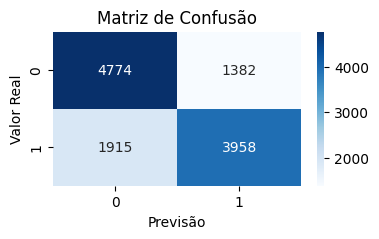

Relatório de Classificação para Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74      6156
         1.0       0.74      0.67      0.71      5873

    accuracy                           0.73     12029
   macro avg       0.73      0.72      0.72     12029
weighted avg       0.73      0.73      0.73     12029



In [ ]:
# Criando o modelo Gradient Boosting
gb_confusao = GradientBoostingClassifier(n_estimators=num_trees)

# Treinando o modelo
gb_confusao.fit(X_train, y_train)

# Fazendo previsões com o modelo
y_confusao_pred = gb_confusao.predict(X_test)


confusao = confusion_matrix(y_test, y_confusao_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(confusao, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()

classification_rep_gb = classification_report(y_test, y_confusao_pred)
print("Relatório de Classificação para Gradient Boosting Classifier:")
print(classification_rep_gb)

# 7. Finalização do modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes - GradientBoost

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=50)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("GB: {} " .format((accuracy_score(y_test, predictions))))


GB: 0.7250810541192119 


In [ ]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)

GradientBoostingClassifier(n_estimators=50)